# **Personal Loan Acceptance Prediction**

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [8]:
# Load the dataset
df = pd.read_csv("bank.csv")

# Basic inspection
print("Dataset shape:", df.shape)
print(df.columns)
print(df.head())

Dataset shape: (11162, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown   

In [9]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


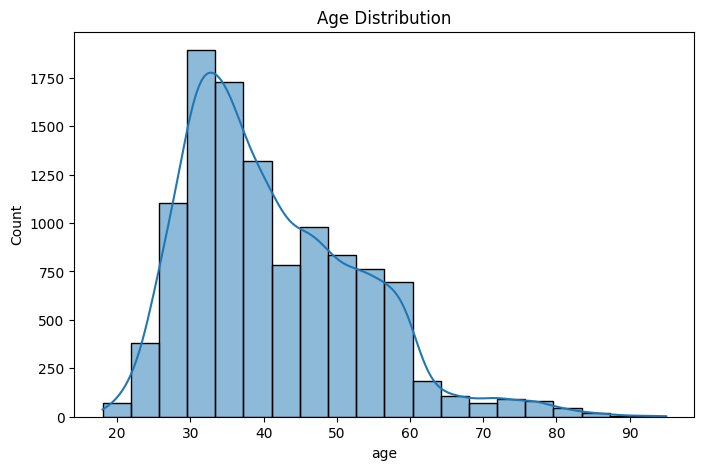

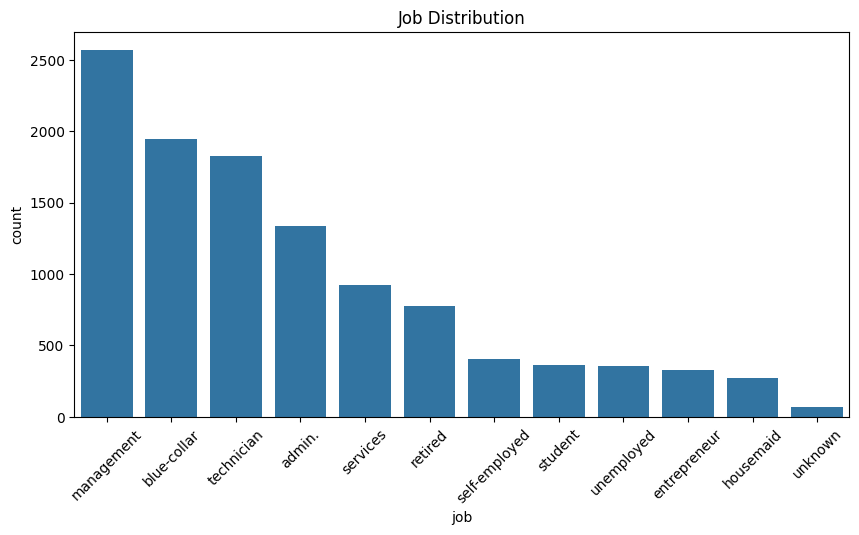

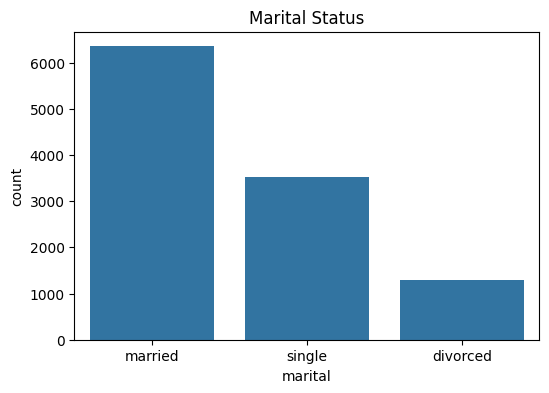

In [10]:
# Visualizations
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='job', order=df['job'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Job Distribution")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='marital')
plt.title("Marital Status")
plt.show()

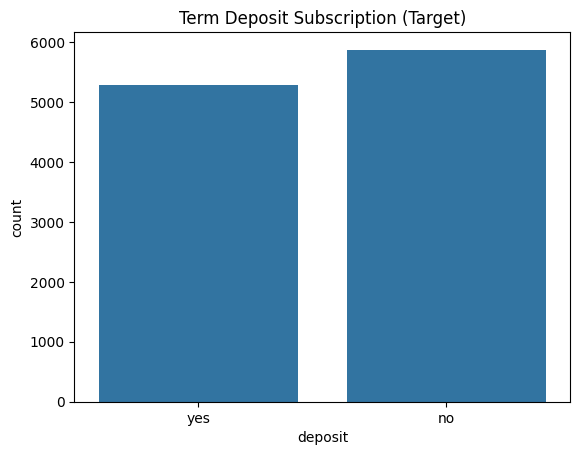

In [5]:
sns.countplot(data=df, x='deposit')
plt.title("Term Deposit Subscription (Target)")
plt.show()

# Encode categorical variables
df_encoded = df.copy()
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [12]:
# Encode target variable 'y' (yes/no → 1/0)
df_encoded['deposit'] = df_encoded['deposit'].map({'yes': 1, 'no': 0})

# Features and target
X = df_encoded.drop('deposit', axis=1)
y = df_encoded['deposit']

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

In [15]:
# Evaluation
print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

print("\n=== Decision Tree ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


=== Logistic Regression ===
Accuracy: 0.7823555754590238
[[938 228]
 [258 809]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233


=== Decision Tree ===
Accuracy: 0.7595163457232422
[[909 257]
 [280 787]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1166
           1       0.75      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233

